# Assignment 1

In [1]:
import kagglehub
dataset = kagglehub.dataset_download('vishweshsalodkar/wild-animals')

print('Data source import complete.')


100%|██████████| 7.37M/7.37M [00:00<00:00, 64.2MB/s]

Extracting files...


Data source import complete.


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

In [3]:
print(os.listdir(dataset))

['Animals']


In [4]:
dataset = os.path.join(dataset, "Animals")
print(os.listdir(dataset))

['Jaguar', 'Tiger', 'Cheetah', 'Leopard', 'Lion']


In [5]:
categories = os.listdir(dataset)
print(categories)

['Jaguar', 'Tiger', 'Cheetah', 'Leopard', 'Lion']


In [6]:
print([os.listdir(os.path.join(dataset, category)) for category in categories])

[['jaguar-1727406__340.jpg', 'photo-1469367498026-54a83d222f12.jpg', 'pexels-photo-7124473.jpeg', 'jaguar-halbwuchsig-sepia-profile-41002.jpeg', 'pexels-photo-155164.jpeg', 'photo-1552845301-7ff61cbb2865.jpg', 'photo-1528238344097-a8994f7c74e4.jpg', 'pexels-photo-8562894.jpeg', 'photo-1604994956847-2b0ab169366b.jpg', 'jaguar-1337201__340.jpg', 'africa-animals-zoo-tiger.jpg', 'pexels-photo-4468189 (1).jpeg', 'photo-1577053711673-cdf8e87a38e5.jpg', 'jaguar-859412__340.jpg', 'photo-1601544359642-c76c4f7c3221.jpg', 'photo-1584313452299-86bbb3f16eca.jpg', 'pexels-photo-5899760.jpeg', 'pexels-photo-4468189.jpeg', 'photo-1477949775154-d739b82400b3 (1).jpg', 'photo-1477949775154-d739b82400b3.jpg', 'photo-1534759846116-5799c33ce22a.jpg', 'photo-1614371611363-bbce32167c6c.jpg', 'animal-2607__340.jpg', 'photo-1584307228520-94ee423187ed.jpg', 'photo-1584313453147-be9beeb8504f.jpg', 'pexels-photo-773004.jpeg', 'animal-world-3193850__340.jpg', 'photo-1486173789830-3a5236a03ab1.jpg', 'jaguar-2188660_

In [9]:
train_data = []

for label, category in enumerate(categories):
    category_path = os.path.join(dataset, category)
    for image_file in tqdm(os.listdir(category_path)):
        image_path = os.path.join(category_path, image_file)
        image_bgr = cv2.imread(image_path)
        image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
        resized_image = cv2.resize(image_gray, (250, 250))
        train_data.append((resized_image, label))

100%|██████████| 32/32 [00:00<00:00, 294.80it/s]


In [8]:
print(len(train_data))

170


In [11]:
np.random.shuffle(train_data)

In [12]:
print([train_data[i][1] for i in range(10)])

[3, 4, 1, 0, 3, 4, 4, 3, 3, 4]


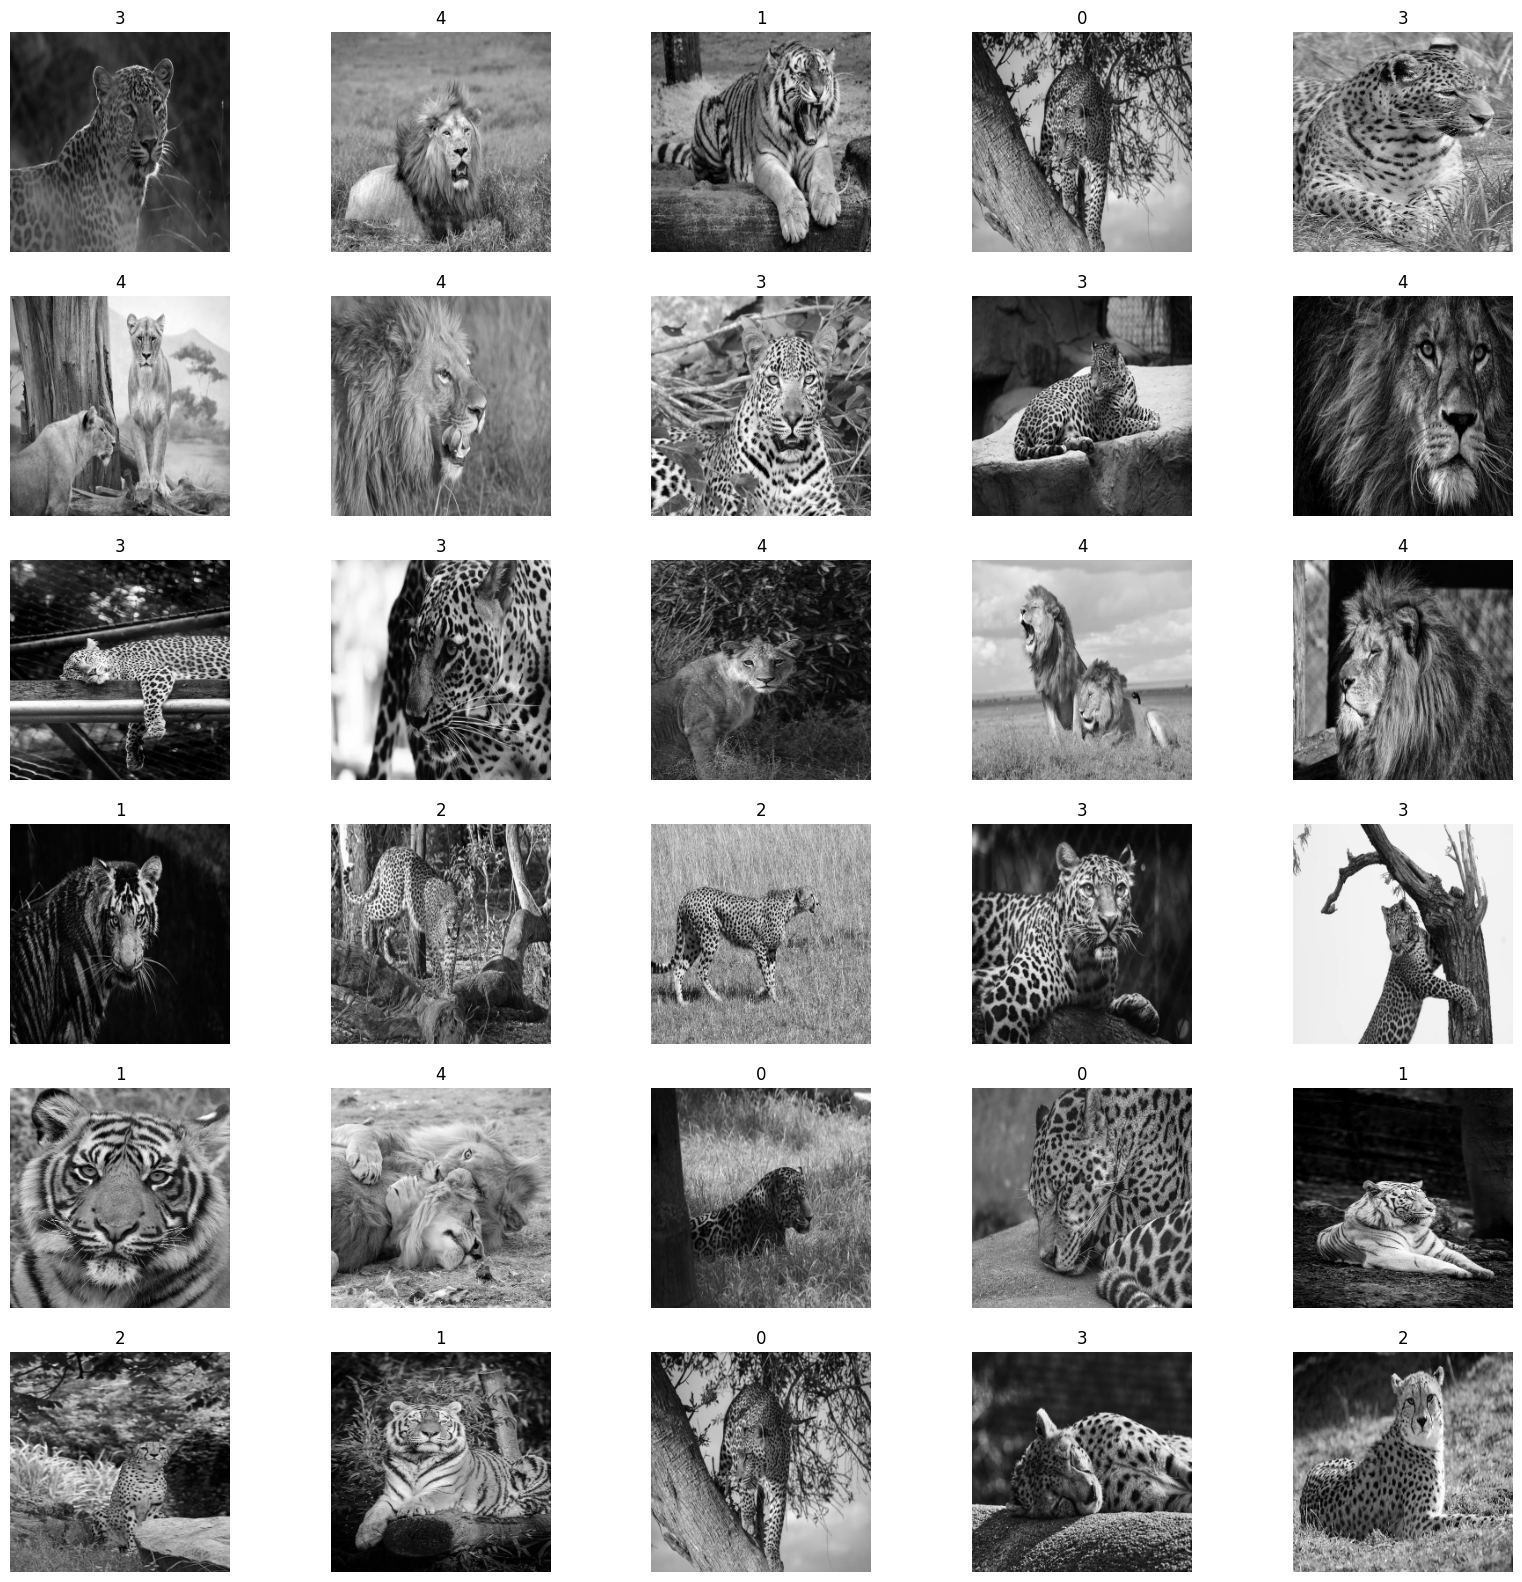

In [16]:
fig, axes = plt.subplots(6, 5, figsize=(20, 20))

for data, ax in zip(train_data, axes.ravel()):
    image, label = data
    ax.imshow(image, cmap="gray")
    ax.set_title(label)
    ax.axis("off")
plt.show()

In [19]:
folds = list(map(lambda i: train_data[i::5], range(5)))
len(folds)

5

In [31]:
for i in range(len(folds)):
    labels = [data[1] for data in folds[i]]
    print(f"Fold Validation {i + 1}")
    print(f"Labels: {labels}")
    print(f"Total Samples: {len(folds[i])}")
    print("-" * 30)

Fold Validation 1
Labels: [3, 4, 3, 1, 1, 2, 1, 1, 0, 1, 2, 3, 1, 1, 1, 2, 4, 0, 2, 0, 4, 2, 1, 1, 4, 4, 1, 3, 2, 0, 4, 3, 3, 2]
Total Samples: 34
------------------------------
Fold Validation 2
Labels: [4, 4, 3, 2, 4, 1, 2, 2, 2, 0, 1, 2, 1, 3, 1, 2, 4, 4, 0, 3, 2, 0, 3, 3, 4, 2, 3, 1, 4, 0, 0, 1, 0, 0]
Total Samples: 34
------------------------------
Fold Validation 3
Labels: [1, 3, 4, 2, 0, 0, 4, 1, 4, 1, 2, 0, 1, 2, 4, 3, 1, 2, 3, 4, 1, 4, 0, 4, 0, 3, 0, 1, 1, 4, 0, 0, 1, 2]
Total Samples: 34
------------------------------
Fold Validation 4
Labels: [0, 3, 4, 3, 0, 3, 0, 2, 2, 2, 2, 1, 2, 4, 0, 0, 4, 2, 2, 3, 4, 0, 2, 0, 3, 3, 1, 4, 4, 0, 0, 1, 1, 3]
Total Samples: 34
------------------------------
Fold Validation 5
Labels: [3, 4, 4, 3, 1, 2, 0, 2, 3, 3, 3, 2, 4, 1, 1, 3, 3, 1, 1, 4, 1, 3, 4, 1, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2]
Total Samples: 34
------------------------------


In [35]:
def difference(valid_img, train_img):
    return np.sqrt(np.sum(np.square(valid_img - train_img)))

In [33]:
from collections import Counter

def knn_prediction(difference, k = 1):
    knns = difference[:k]
    knn_labels = [label for _, label in knns]
    most_common_label = Counter(knn_labels).most_common(1)[0][0]

    return most_common_label

In [37]:
fold_accuracies = []
avg_accuracies = []

for k in range(1, 31):
    accuracies = []

    for i in range(len(folds) - 1, -1, -1):
        predictions = []
        valid_set = folds[i]
        train_set = [item for j, fold in enumerate(folds) if j != i for item in fold]

        for valid_img in valid_set:
            differences = [
                (difference(valid_img[0], train_img[0]), train_img[1])
                for train_img in train_set
            ]
            differences.sort()
            predicted_label = knn_prediction(differences, k)

            predictions.append(1 if predicted_label == valid_img[1] else 0)

        fold_accuracy = sum(predictions) / len(predictions)
        accuracies.append(fold_accuracy)

    fold_accuracies.append(accuracies)
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_accuracies.append(avg_accuracy)

    print(f"K: {k} Centroid Accuracy: {avg_accuracy:.2f}")

# Print results
print(f"Fold Accuracies: {fold_accuracies}")
print(f"Centroid Fold Accuracies: {avg_accuracies}")

K: 1 Centroid Accuracy: 0.30
K: 2 Centroid Accuracy: 0.30
K: 3 Centroid Accuracy: 0.28
K: 4 Centroid Accuracy: 0.28
K: 5 Centroid Accuracy: 0.24
K: 6 Centroid Accuracy: 0.27
K: 7 Centroid Accuracy: 0.27
K: 8 Centroid Accuracy: 0.26
K: 9 Centroid Accuracy: 0.24
K: 10 Centroid Accuracy: 0.25
K: 11 Centroid Accuracy: 0.25
K: 12 Centroid Accuracy: 0.25
K: 13 Centroid Accuracy: 0.23
K: 14 Centroid Accuracy: 0.24
K: 15 Centroid Accuracy: 0.25
K: 16 Centroid Accuracy: 0.27
K: 17 Centroid Accuracy: 0.28
K: 18 Centroid Accuracy: 0.27
K: 19 Centroid Accuracy: 0.23
K: 20 Centroid Accuracy: 0.24
K: 21 Centroid Accuracy: 0.24
K: 22 Centroid Accuracy: 0.23
K: 23 Centroid Accuracy: 0.22
K: 24 Centroid Accuracy: 0.24
K: 25 Centroid Accuracy: 0.24
K: 26 Centroid Accuracy: 0.23
K: 27 Centroid Accuracy: 0.24
K: 28 Centroid Accuracy: 0.24
K: 29 Centroid Accuracy: 0.25
K: 30 Centroid Accuracy: 0.26
Fold Accuracies: [[0.47058823529411764, 0.20588235294117646, 0.29411764705882354, 0.2647058823529412, 0.26470

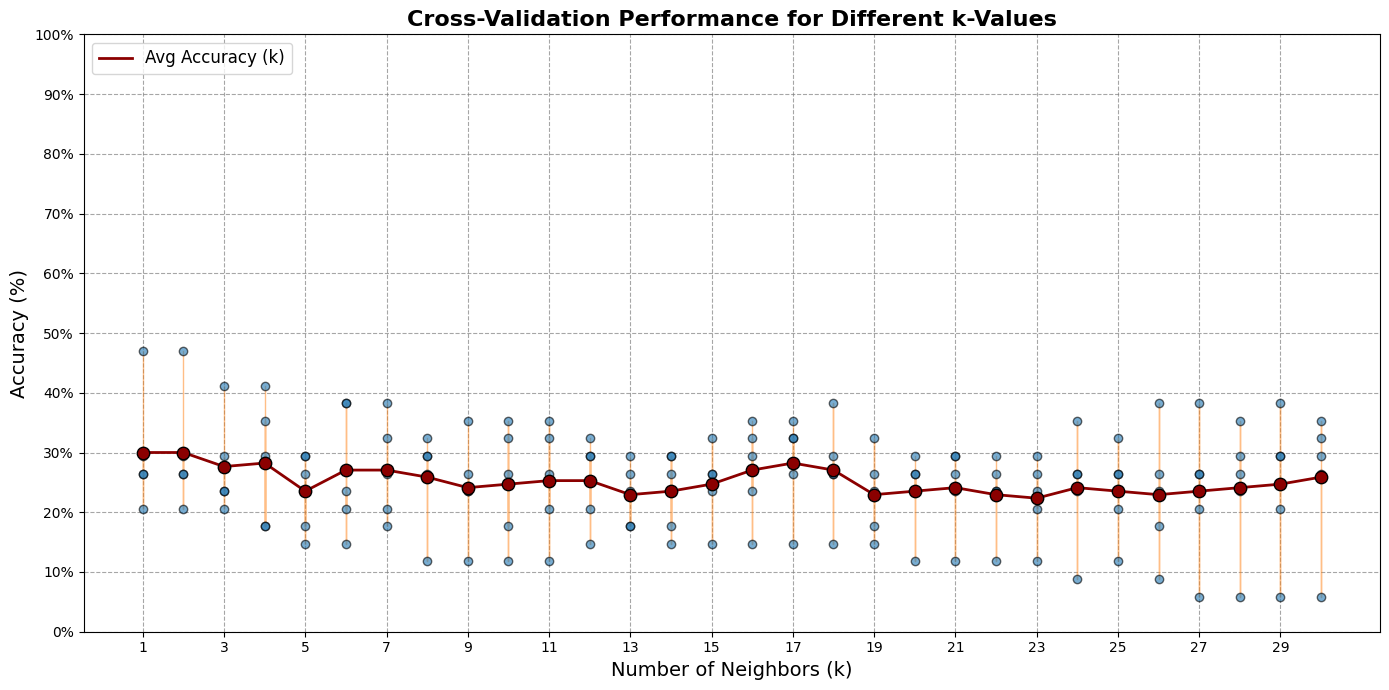

In [42]:
plt.figure(figsize=(14, 7))

for k, fold_accuracy in enumerate(fold_accuracies):
    plt.scatter([k+1] * len(fold_accuracy), fold_accuracy, color='tab:blue', alpha=0.6, edgecolors='black', zorder=5)
    plt.plot([k+1] * len(fold_accuracy), fold_accuracy, linestyle='-', color='tab:orange', alpha=0.5, linewidth=1)

plt.plot(range(1, 31), avg_accuracies, color='darkred', linestyle='-', linewidth=2, label='Avg Accuracy (k)', zorder=10)
plt.scatter(range(1, 31), avg_accuracies, color='darkred', s=80, edgecolors='black', zorder=15)

plt.title('Cross-Validation Performance for Different k-Values', fontsize=16, fontweight='bold')
plt.xlabel('Number of Neighbors (k)', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.xticks(range(1, 31, 2))
plt.yticks([i * 0.1 for i in range(11)], [f'{i*10}%' for i in range(11)])
plt.grid(True, linestyle='--', color='gray', alpha=0.7)

plt.legend(loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()
